In [ ]:
# Update dataset: !git pull
!git clone https://github.com/casperbh96/COVID-19-Detection.git dataset

Cloning into 'dataset'...
remote: Enumerating objects: 9745, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9745 (delta 4), reused 0 (delta 0), pack-reused 9736
Receiving objects: 100% (9745/9745), 151.88 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (74/74), done.
Checking out files: 100% (8683/8683), done.


Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2, time
import tensorflow as tf

tf.__version__

'2.6.0'

Loading dataset

In [ ]:
covid_path = 'dataset/covid_dataset.csv'
covid_image_path = 'dataset/covid_adjusted/'

normal_path = 'dataset/normal_xray_dataset.csv'
normal_image_path = 'dataset/normal_dataset/'

covid_df = pd.read_csv(covid_path, usecols=['filename', 'finding'])
normal_df = pd.read_csv(normal_path, usecols=['filename', 'finding'])

normal_df = normal_df.head(99)

covid_df.head()

,filename,finding
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
4,nejmc2001573_f1a.jpeg.jpg,COVID-19


In [ ]:
covid_images = []
covid_labels = []

for index, row in covid_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = covid_image_path + filename

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    covid_images.append(image)
    covid_labels.append(label)

normal_images = []
normal_labels = []

for index, row in normal_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = normal_image_path + filename

    # temporary fix while we preprocess ALL the images
    if filename == '4c268764-b5e5-4417-85a3-da52916984d8.jpg':
        break

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    normal_images.append(image)
    normal_labels.append(label)

# normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255

# normalize to interval of [0,1]
normal_images = np.array(normal_images) / 255

Visualize the images

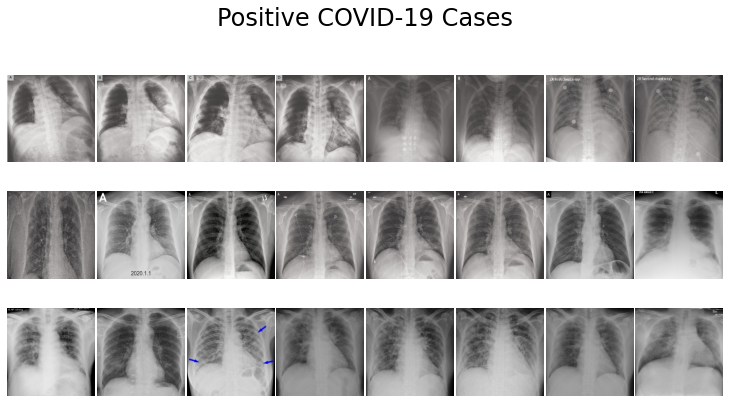

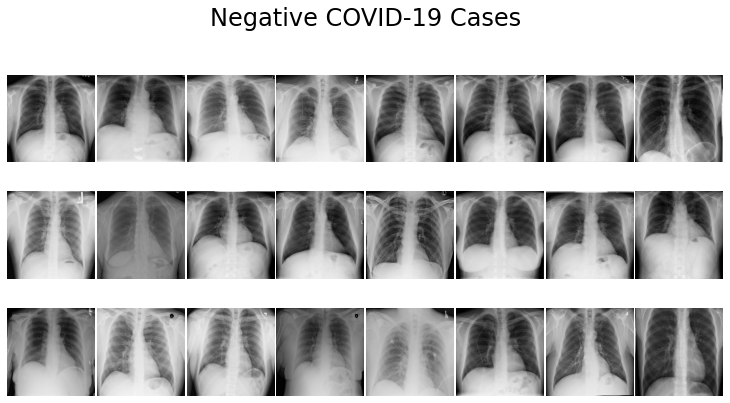

In [ ]:
def plot_images(images, title):
    nrows, ncols = 3, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()

plot_images(covid_images, 'Positive COVID-19 Cases')
plot_images(normal_images, 'Negative COVID-19 Cases')

Splitting Datasets Into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# split into training and testing
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)

normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(
    normal_images, normal_labels, test_size=0.2)

X_train = np.concatenate((normal_x_train, covid_x_train), axis=0)
X_test = np.concatenate((normal_x_test, covid_x_test), axis=0)
y_train = np.concatenate((normal_y_train, covid_y_train), axis=0)
y_test = np.concatenate((normal_y_test, covid_y_test), axis=0)

# make labels into categories - either 0 or 1
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

**Image Augmentation**
1.   Contrast



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

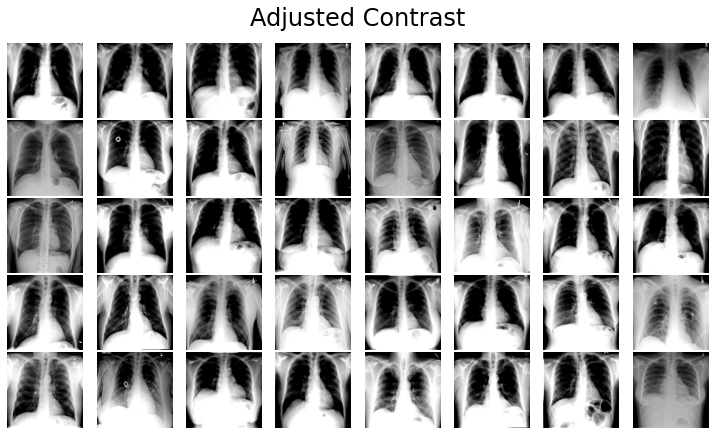

In [ ]:
X_train_contrast = []

for x in X_train:
    contrast = tf.image.adjust_contrast( x, 2 ) #It takes two parameter: Images and constrast_factor. 
    #Images:Images to adjust. At least 3-D.
    #Constrast_factor:A float multiplier for adjusting contrast.
    X_train_contrast.append(contrast.numpy())

plot_images(X_train_contrast, 'Adjusted Contrast')



2.   Saturation



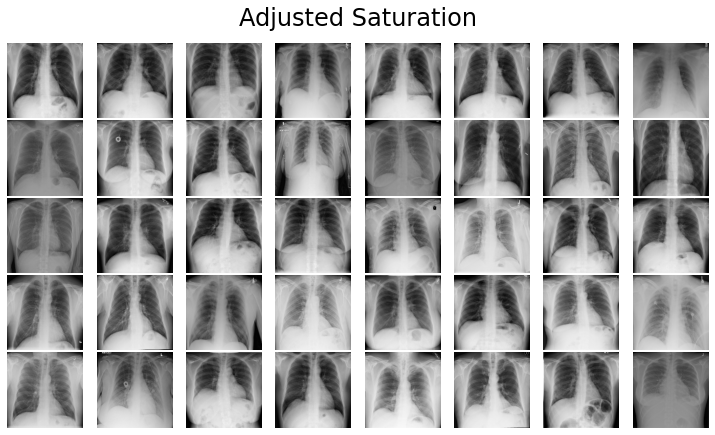

In [ ]:
X_train_saturation = []

for x in X_train:
    saturation = tf.image.adjust_saturation( x, 3 )
    X_train_saturation.append(saturation.numpy())

plot_images(X_train_saturation, 'Adjusted Saturation')

Flip Up Down

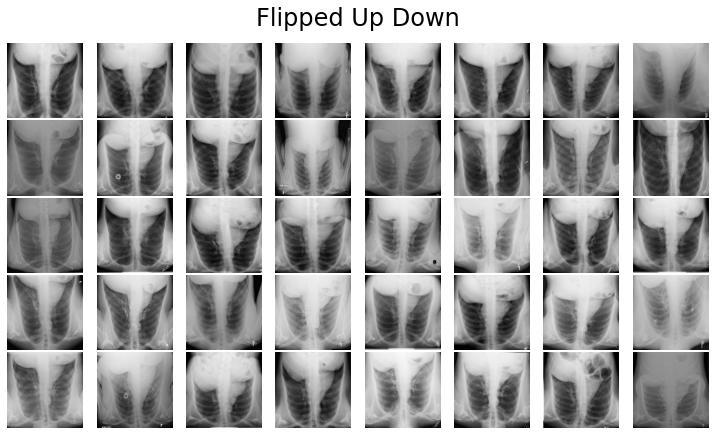

In [ ]:
X_train_flipped_up_down = []

for x in X_train:
    flipped = tf.image.flip_up_down(x)
    X_train_flipped_up_down.append(flipped.numpy())

plot_images(X_train_flipped_up_down, 'Flipped Up Down')

In [ ]:
pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 7.6 MB/s 


Rotations

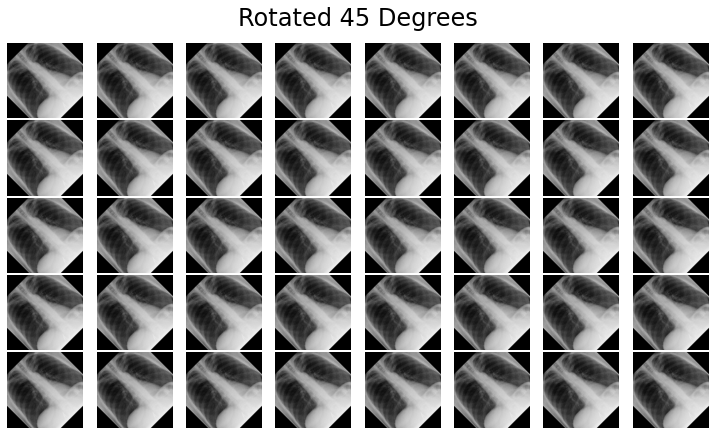

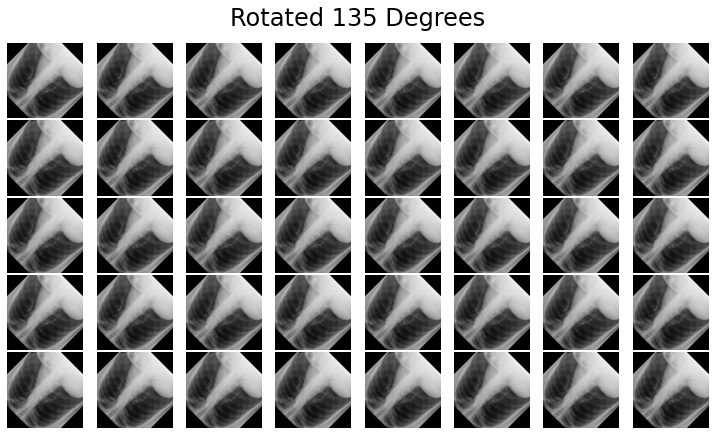

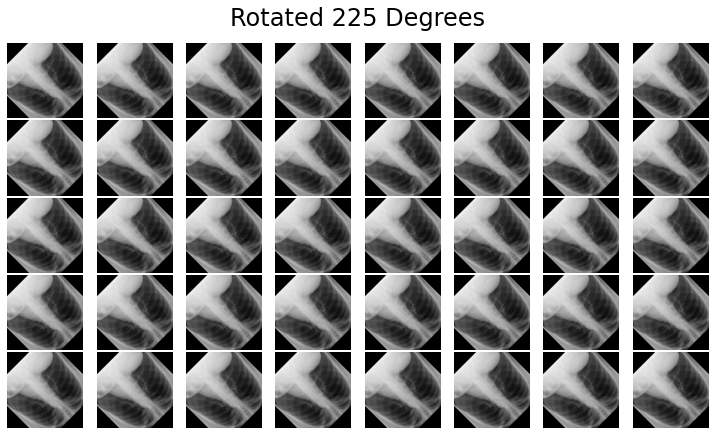

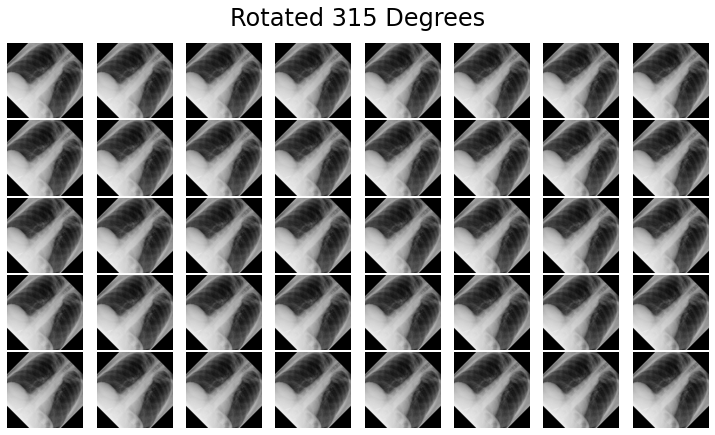

In [ ]:
import tensorflow_addons as tfa
from math import radians
X_train_rot_45_deg = []
X_train_rot_135_deg = []
X_train_rot_225_deg = []
X_train_rot_315_deg = []

for x in X_train:
    deg_45 = tfa.image.transform_ops.rotate(image, radians(45))
    deg_135 = tfa.image.transform_ops.rotate(image, radians(135))
    deg_225 = tfa.image.transform_ops.rotate(image, radians(225))
    deg_315 = tfa.image.transform_ops.rotate(image, radians(315))

    X_train_rot_45_deg.append(deg_45)
    X_train_rot_135_deg.append(deg_135)
    X_train_rot_225_deg.append(deg_225)
    X_train_rot_315_deg.append(deg_315)

plot_images(X_train_rot_45_deg, 'Rotated 45 Degrees')
plot_images(X_train_rot_135_deg, 'Rotated 135 Degrees')
plot_images(X_train_rot_225_deg, 'Rotated 225 Degrees')
plot_images(X_train_rot_315_deg, 'Rotated 315 Degrees')